In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

In [2]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent', 
                 'company_location', 'rating', 'bean_type', 'broad_origin']

In [3]:
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

In [4]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
bar_id              1795 non-null int64
company             1795 non-null object
specific_origin     1795 non-null object
ref                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null object
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           1794 non-null object
broad_origin        1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [5]:
cacao

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


## Bar_id

1795


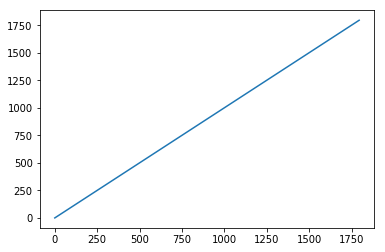

In [6]:
print(cacao['bar_id'].nunique())
plt.plot(cacao['bar_id'])

Тут все просто: это столбец индексов батончиков, количество уникальных значений соответствует количеству строк. Вряд ли он пригодится для дальнейшего анализа, удалим его.

In [7]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

## Company

In [8]:
cacao['company'].value_counts().reset_index()

,index,company
0,,99
1,Soma,45
2,Bonnat,26
3,Fresco,26
4,Pralus,25
...,...,...
403,Confluence,1
404,Peppalo,1
405,Shattel,1
406,Fearless (AMMA),1


In [9]:
cacao['company'] = cacao['company'].apply(lambda x: None if x.strip() == '' else x)

In [10]:
cacao['company'].value_counts().reset_index()

,index,company
0,Soma,45
1,Fresco,26
2,Bonnat,26
3,Pralus,25
4,Domori,22
...,...,...
402,Shattel,1
403,Fearless (AMMA),1
404,Manifesto Cacao,1
405,Nanea,1


In [11]:
(cacao['company'].value_counts() > 10).sum()

30

In [12]:
cacao.loc[:, ['company']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


In [13]:
cacao['company'].reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 2 columns):
index      1795 non-null int64
company    1696 non-null object
dtypes: int64(1), object(1)
memory usage: 28.2+ KB


In [14]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Shattel,1
Fearless (AMMA),1
Manifesto Cacao,1
Nanea,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


Итого у нас 407 уникальных значений и 99 строк, в которых производитель неизвестен. А вот компаний, у которых в рейтинге больше 10 батончиков, всего 30. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

## specific_origin

In [15]:
cacao['specific_origin'].value_counts().reset_index()

,index,specific_origin
0,,58
1,Madagascar,55
2,Peru,44
3,Ecuador,39
4,Dominican Republic,33
...,...,...
1008,Nicalizo,1
1009,Dong Nai,1
1010,Tokiala,1
1011,El Ceibo Coop,1


In [16]:
cacao['specific_origin'] = cacao['specific_origin'].apply(lambda x: None if x.strip() == '' else x)

In [17]:
cacao['specific_origin'].value_counts().reset_index()

,index,specific_origin
0,Madagascar,55
1,Peru,44
2,Ecuador,39
3,Dominican Republic,33
4,Venezuela,21
...,...,...
1007,"Guaniamo, Amazonas",1
1008,Nicalizo,1
1009,Dong Nai,1
1010,Tokiala,1


In [18]:
(cacao['specific_origin'].value_counts() > 10).sum()

15

## REF

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

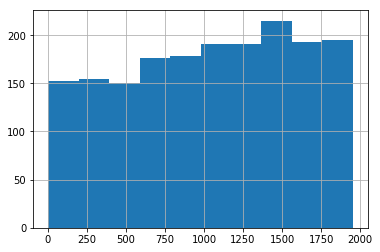

In [19]:
cacao['ref'].hist()
cacao['ref'].describe()

## review_date

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

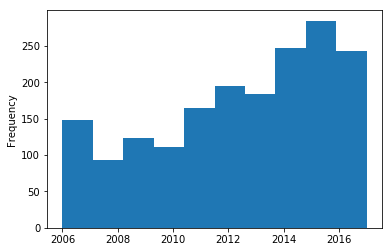

In [20]:
cacao['review_date'].plot(kind='hist')
cacao['review_date'].describe()

## cocoa_percent

In [21]:
cacao['cocoa_percent'] = cacao['cocoa_percent'].apply(lambda x: float(str(x).replace('%', '')))

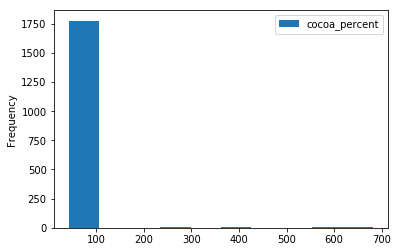

In [22]:
cacao[['cocoa_percent']].describe()
cacao[['cocoa_percent']].plot(kind='hist')

Видим, что основное распределение лежит между  и  процентами и есть потенциальные выбросы свыше % (об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

[percentile(25) - 1.5 * IQR : percentile(75) + 1.5 * IQR],
где IQR = percentile(75) - percentile(25)

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


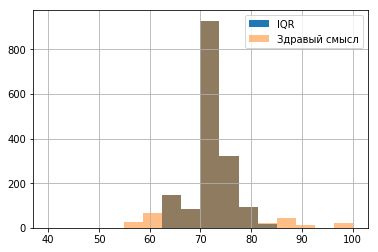

In [23]:
IQR = cacao['cocoa_percent'].quantile(0.75) - cacao['cocoa_percent'].quantile(0.25)
perc25 = cacao['cocoa_percent'].quantile(0.25)
perc75 = cacao['cocoa_percent'].quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao['cocoa_percent'][cacao['cocoa_percent'].between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins=16, range=(40, 100), label='IQR')
 
cacao['cocoa_percent'][cacao['cocoa_percent'] <= 100].hist(
alpha=0.5, bins=16, range=(40, 100), label='Здравый смысл')
 
plt.legend();

Однако такой способ отбора выбросов работает не всегда. Когда мы знаем потенциальные характеристики распределения, лучше отобрать их, пользуясь здравым смыслом. Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально реальных значений, поэтому воспользуемся здравым смыслом. Очевидно, что при сборе данных произошла ошибка. К сожалению, такое случается нередко.

In [24]:
cacao = cacao[cacao['cocoa_percent'] <= 100]

## company_location

In [25]:
cacao['company_location'].value_counts()

U.S.A.            756
France            155
Canada            124
U.K.               94
Italy              63
                 ... 
Niacragua           1
Czech Republic      1
Suriname            1
India               1
Ghana               1
Name: company_location, Length: 60, dtype: int64

In [26]:
display(pd.DataFrame(cacao['company_location'].value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao['company_location'].value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Niacragua,1
Czech Republic,1
Suriname,1
India,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
company_location    1776 non-null object
dtypes: object(1)
memory usage: 27.8+ KB


## rating

In [27]:
cacao['rating']

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

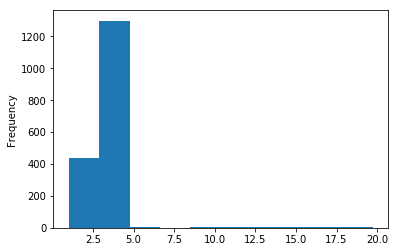

In [28]:
cacao['rating'].plot(kind='hist')
cacao['rating'].describe()

Как мы видим, большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й — 3.5), что позволяет сделать два предположения:

1. Скорее всего была использована пятибалльная шкала оценивания
2. В данных есть выбросы.

Давайте это проверим:

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


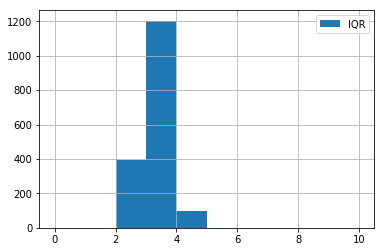

In [29]:
IQR = cacao['rating'].quantile(0.75) - cacao['rating'].quantile(0.25)
perc25 = cacao['rating'].quantile(0.25)
perc75 = cacao['rating'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), 
      '75-й перцентиль: {},'.format(perc75), 
      "IQR: {}, ".format(IQR), 
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao['rating'][cacao['rating'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:

In [30]:
cacao = cacao[cacao['rating'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

## bean_type

In [31]:
cacao['bean_type'].value_counts().head()

                        829
Trinitario              401
Criollo                 147
Forastero                81
Forastero (Nacional)     50
Name: bean_type, dtype: int64

In [34]:
cacao['bean_type'] = cacao['bean_type'].astype(str).apply(lambda x: None if x.strip() == '' else x)

In [35]:
display(pd.DataFrame(cacao['bean_type'].value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao['bean_type'].value_counts() > 10).sum())
print("Уникальных значений:", cacao['bean_type'].nunique())
cacao[['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    861 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


Мы видим, что есть строка со значением nan, надо заменить её на None для удобства. Также мы видим, что многие типы бобов указаны с пояснением, например "Criollo (Ocumare 67)", такие значения стоит привести к общему виду.

Также некоторые батончики сделаны из комбинации какао-бобов. Возможно, этот столбец для дальнейшего анализа нужно будет преобразовать через метод get_dummies(), однако сейчас мы делать этого не будем.

In [36]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [37]:
display(pd.DataFrame(cacao['bean_type'].value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao['bean_type'].value_counts() > 10).sum())
print("Уникальных значений:", cacao['bean_type'].nunique())
cacao[['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
Matina,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    860 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


## broad_origin

In [38]:
cacao[['broad_origin']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1689 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [39]:
cacao['broad_origin'].value_counts()

Venezuela               202
Ecuador                 179
Peru                    159
Madagascar              138
Dominican Republic      135
                       ... 
Ven, Bolivia, D.R.        1
Peru, Madagascar          1
Venezuela, Carribean      1
Venezuela, Trinidad       1
Principe                  1
Name: broad_origin, Length: 97, dtype: int64

In [40]:
cacao['broad_origin'] = cacao['broad_origin'].astype(str).apply(lambda x: None if x.strip() == '' else x)

In [41]:
display(pd.DataFrame(cacao['broad_origin'].value_counts()))
print('Значения встречаются более 10 раз:', (cacao['broad_origin'].value_counts() > 10).sum())
print('Уникальные значения:2', cacao['broad_origin'].nunique())
cacao[['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"Peru, Madagascar",1
"Ecuador, Mad., PNG",1
Suriname,1
"Venezuela, Trinidad",1


Значения встречаются более 10 раз: 25
Уникальные значения:2 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1631 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [42]:
cacao['broad_origin'].unique()

array(['Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama', 'Madagascar',
       'Brazil', 'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea',
       'Bolivia', 'Fiji', 'Mexico', 'Indonesia', 'Trinidad', 'Vietnam',
       'Nicaragua', 'Tanzania', 'Dominican Republic', 'Ghana', 'Belize',
       None, 'Jamaica', 'Honduras', 'Costa Rica', 'Guatemala', 'Haiti',
       'Congo', 'Philippines', 'Domincan Republic', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Grenada',
       'Sao Tome', 'Uganda', 'Martinique', 'Sao Tome & Principe',
       'Vanuatu', 'Australia', 'Liberia', 'Ecuador, Costa Rica',
       'West Africa', 'Hawaii', 'St. Lucia', 'Cost Rica, Ven',
       'Peru, Madagascar', 'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Trinidad-Tobago',
       'Peru, Ecuador, Venezuela', 'Venezuela, Dom

In [43]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [44]:
cacao['broad_origin'] = cacao['broad_origin'].apply(fix_countries).sort_values()

In [45]:
display(pd.DataFrame(cacao['broad_origin'].value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao['broad_origin'].value_counts() > 10).sum())
print("Уникальных значений:", cacao['broad_origin'].nunique())
cacao[['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
Madagascarrtinique,1
"Madagascar,Ecuador",1
"Ecuador,CostaRica",1
"Ecuador,Madagascar,PapuaNewGuinea",1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1630 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений (хотя и всего на 4). Однако такая трансформация в последствии поможет нам преобразовать данные через метод get_dummies(). Пропущенные значения заполнить не получится, так как данных всё ещё достаточно мало.

## Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

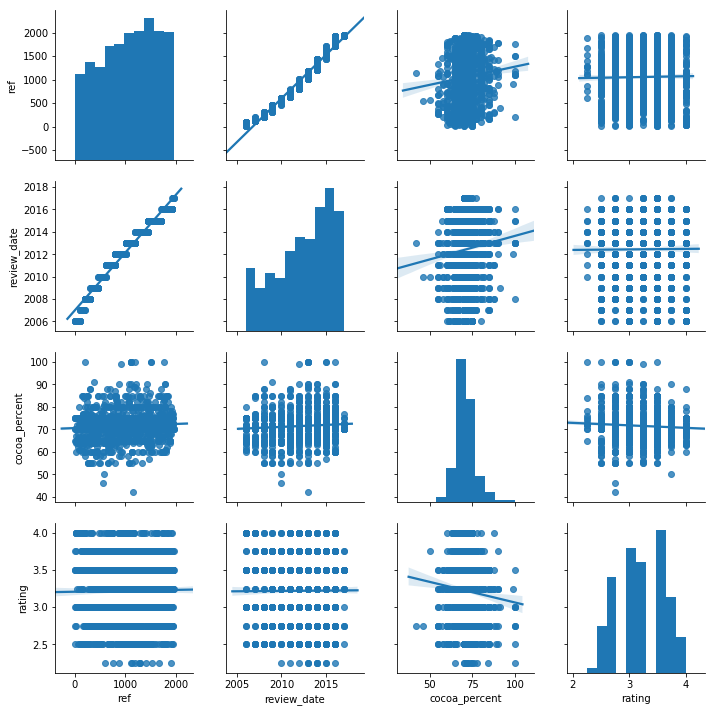

In [46]:
sns.pairplot(cacao, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [47]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

## Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [72]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

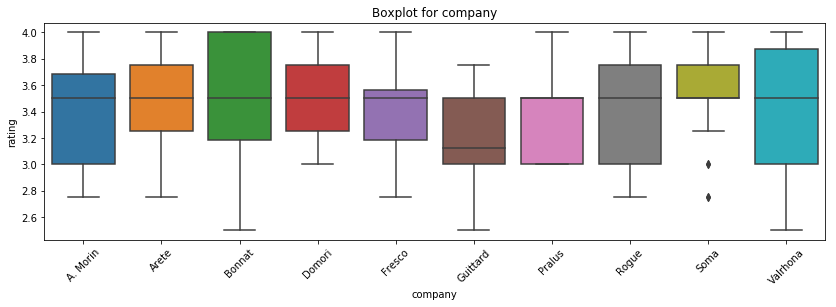

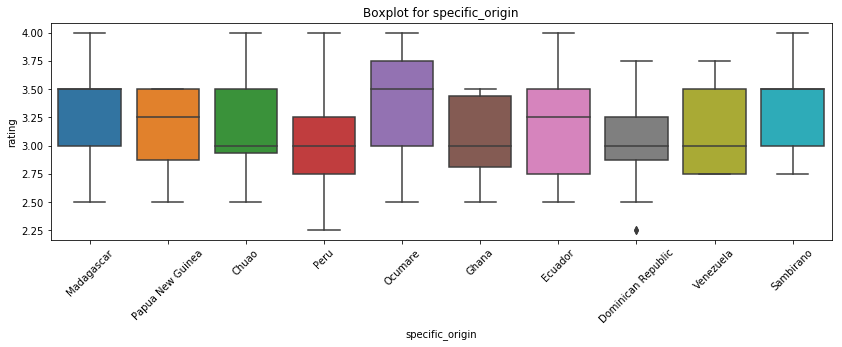

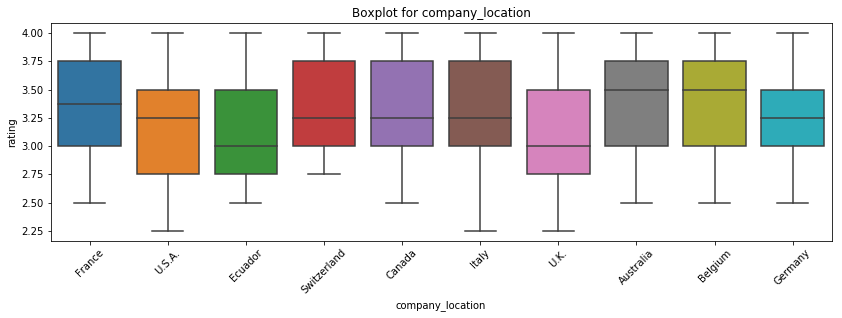

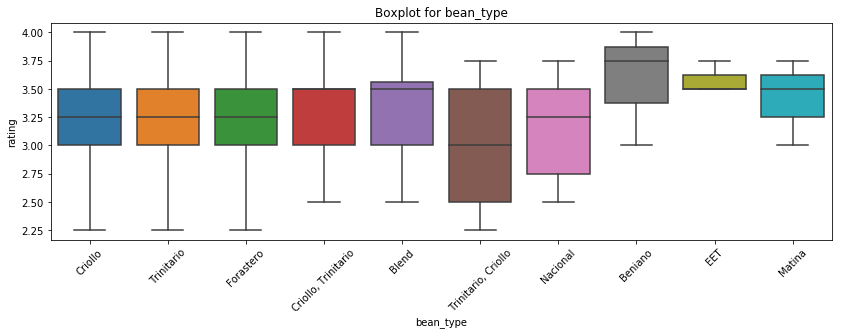

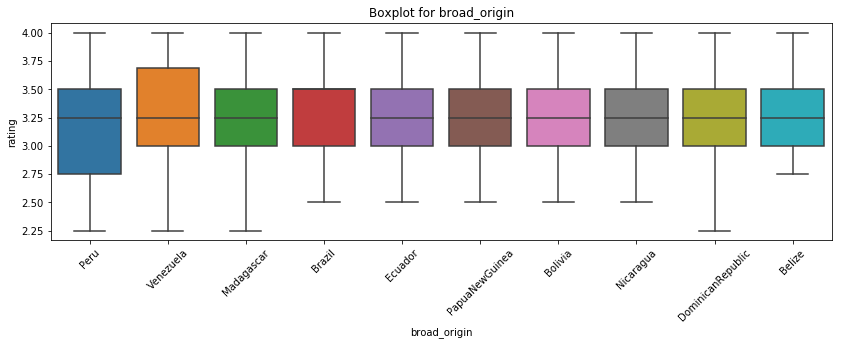

In [73]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. 

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [74]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                     cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [75]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [76]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


## Столбцы на начало

- **Bar id** — ID батончика в базе данны
- **Company (Maker-if known)** — название компании, изготовившей батончик.
- **Specific Bean Origin or Bar Name** — точное место происхождения какао-бобов.
- **Broad Bean Origin** — название региона, где были выращены какао-бобы.
- **Company Location** — страна, в которой произведён шоколадный батончик.
- **Bean Type** — вид какао-бобов, используемых в батончике.
- **REF** — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
- **Review Date** — год публикации рецензии.
- **Cocoa Percent** — процент какао в шоколаде.
- **Rating** — оценка батончика фокус-группой.

## Столбцы после обработки

- ***Rating*** — оценка батончика фокус-группой. - *убрали строки с выбросами в этом поле*


- **Review Date** — год публикации рецензии.
- **Cocoa Percent** — процент какао в шоколаде. - *убрали строки. где поле более 100*


- **Company (Maker-if known)** — название компании, изготовившей батончик.
- **Specific Bean Origin or Bar Name** — точное место происхождения какао-бобов.
- **Company Location** — страна, в которой произведён шоколадный батончик.

<s>- **Bar id** — ID батончика в базе данных</s>
 
<s>- **REF** — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.</s>

<s>- **Bean Type** — вид какао-бобов, используемых в батончике.</s>

<s>- **Broad Bean Origin** — название региона, где были выращены какао-бобы.</s>

-----

## Выводы

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

- В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
- Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
- Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.